# This notebook is part 2 of 2. 

#### In this notebook, various models, including linear regression, random forest, decision tree, and LSTM models are used to predict Bitcoin price. 


# TITLE: BITCOIN price prediction using social media information

### Objective: 
#### The objective of this project is to analyse the social media information and examine the association between bitcoin price and social media information. 

### Research design:
#### The sample period for predicting bitcoin price is from January 2020 to May 2021 (1 year and 6 months). Data from various API are obtained, such as CoinBase (Historic-Crypto) for bitcoin price, Tweeter (tweepy) for tweets on bitcoin, Google Trend (pytrend) for the word search on ‘bitcoin’, and Wikipedia (pageviewapi) for Wikipedia page view on ‘bitcoin’. Tweets collected from bitcoin influential accounts are cleaned and various natural language processing (NLP) have been processed including, removing stop words and emojis, as well as lemmatization and sentiment analysis have been performed. The features including volume traded, polarity score of tweets from twitter accounts, the counts of Wikipedia page view, and google trend scores are utilized in the model to predict bitcoin price. Various models (linear regression, lasso regression, random forest regressor, decision tree regressor, and long short-term model) are trained and used for predicting bitcoin price. The association between bitcoin price and social media information is performed at daily level as daily information is obtained Google trend and Wikipedia page views.

### Libraries:
#### Libraries used in this project are: numpy, pandas, matplotlib, seaborn, sklearn, keras, regular expression (re), json, nltk, textblob, tweepy, pytrends, pageviewapi, Historic_Crypto. 

### Findings: 
#### Sentiment analysis of the tweets from bitcoin influential twitter accounts show that their tweets are mostly neutral or positive, showing a polarity score of 0.095 which indicates a slight positive sentiment. Google Trends and Wikipedia page views (0.74) show high positive correlation with bitcoin price. Based on LSTM model using 3 days as the timesteps, LSTM with Google Trends has the lowest loss function compared to the other models. Moreover, linear regression and lasso regression has the highest accuracy score of over 99%. 

### Further research: 
#### The sample periods can be extended and hourly or minute data can be investigated as bitcoin price is volatile and fast moving. 

In [745]:
#Importing libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd

import seaborn as sns

# from datetime import date
import datetime

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
# plt.style.use('fivethirtyeight')

#Import lib
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR


In [21]:
df = pd.read_csv("new_df1.csv", index_col=[0])

# EDA and Visualisation

Text(0.5, 1.0, 'Correlation matrix')

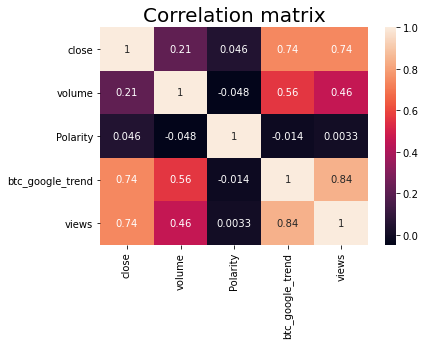

In [318]:
sns.heatmap(df[['close','volume','Polarity','btc_google_trend','views']].corr(), annot=True)
plt.title("Correlation matrix", size=20)


In [327]:
from matplotlib.dates import DateFormatter
import matplotlib.dates


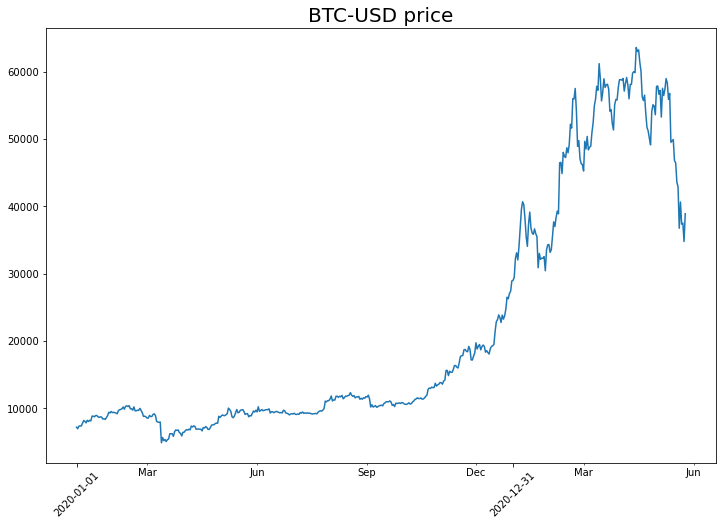

In [358]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(df.close)
plt.title("BTC-USD price", size=20)

# Rotate tick marks on x-axis
# plt.setp(ax.get_xticklabels(), rotation=45)

ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
ax.xaxis.set_minor_locator(matplotlib.dates.MonthLocator((3,6,9,12)))

# ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("\n%Y"))
ax.xaxis.set_minor_formatter(matplotlib.dates.DateFormatter("%b"))
plt.setp(ax.get_xticklabels(), rotation=45, ha="center")

plt.show()

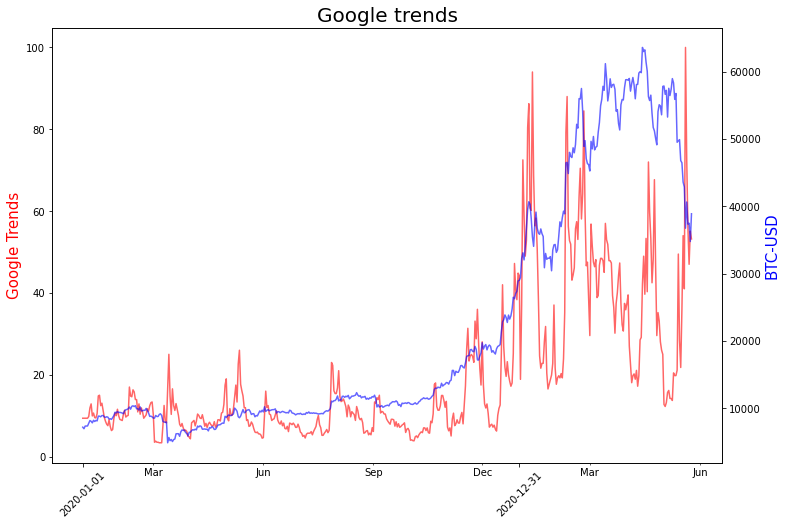

In [389]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(df.btc_google_trend, color='red', alpha=0.6)
ax.set_ylabel('Google Trends', size=15, color='red')

ax2=ax.twinx()
ax2.plot(df.close, color='blue', alpha=0.6)
ax2.set_ylabel('BTC-USD', size=15, color='blue')

plt.title("Google trends", size=20)

# Rotate tick marks on x-axis
# plt.setp(ax.get_xticklabels(), rotation=45)

ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
ax.xaxis.set_minor_locator(matplotlib.dates.MonthLocator((3,6,9,12)))

# ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("\n%Y"))
ax.xaxis.set_minor_formatter(matplotlib.dates.DateFormatter("%b"))
plt.setp(ax.get_xticklabels(), rotation=45, ha="center")

plt.show()

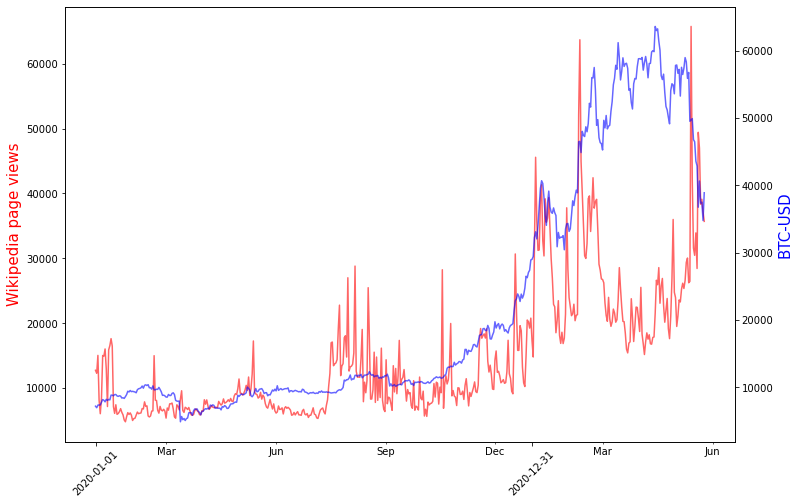

In [380]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(df.views, color='red', alpha=0.6)
ax.set_ylabel('Wikipedia page views', size=15, color='red')

ax2=ax.twinx()
ax2.plot(df.close, color='blue', alpha=0.6)
ax2.set_ylabel('BTC-USD', size=15, color='blue')

# Rotate tick marks on x-axis
# plt.setp(ax.get_xticklabels(), rotation=45)

ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
ax.xaxis.set_minor_locator(matplotlib.dates.MonthLocator((3,6,9,12)))

# ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("\n%Y"))
ax.xaxis.set_minor_formatter(matplotlib.dates.DateFormatter("%b"))
plt.setp(ax.get_xticklabels(), rotation=45, ha="center")

plt.show()

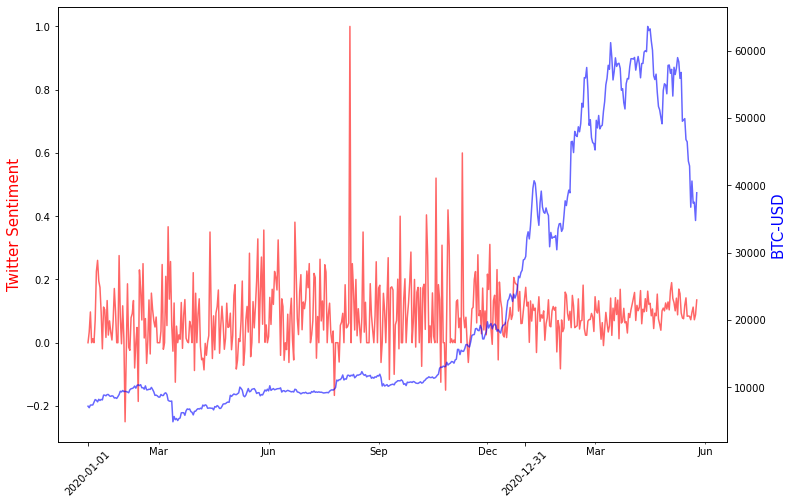

In [381]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(df.Polarity, color='red', alpha=0.6)
ax.set_ylabel('Twitter Sentiment', size=15, color='red')

ax2=ax.twinx()
ax2.plot(df.close, color='blue', alpha=0.6)
ax2.set_ylabel('BTC-USD', size=15, color='blue')

# Rotate tick marks on x-axis
# plt.setp(ax.get_xticklabels(), rotation=45)

ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
ax.xaxis.set_minor_locator(matplotlib.dates.MonthLocator((3,6,9,12)))

# ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("\n%Y"))
ax.xaxis.set_minor_formatter(matplotlib.dates.DateFormatter("%b"))
plt.setp(ax.get_xticklabels(), rotation=45, ha="center")

plt.show()

## Checking the highest and bottom 
## check the reaction to the BTC price

In [385]:
df['Polarity'].sort_values()
## lowest was on 2020-02-01

time
2020-02-01   -0.250000
2020-02-12   -0.185714
2020-07-25   -0.166667
2020-10-26   -0.150000
2020-03-14   -0.125000
                ...   
2020-10-10    0.404167
2020-10-28    0.420000
2020-10-18    0.520455
2020-11-09    0.600000
2020-08-07    1.000000
Name: Polarity, Length: 510, dtype: float64

In [387]:
df['Polarity'].sort_values(ascending=False)
## lowest was on 2020-08-07

time
2020-08-07    1.000000
2020-11-09    0.600000
2020-10-18    0.520455
2020-10-28    0.420000
2020-10-10    0.404167
                ...   
2020-03-14   -0.125000
2020-10-26   -0.150000
2020-07-25   -0.166667
2020-02-12   -0.185714
2020-02-01   -0.250000
Name: Polarity, Length: 510, dtype: float64

# Modelling

In [40]:
# selecting key features
df_new = df[['close','volume','Polarity','btc_google_trend','views']]
df_y = df[['close']]
df_x = df[['volume','Polarity','btc_google_trend','views']]

In [459]:
# without social media
df_x_no = df[['close','volume']]
df_x_no_val = df_x_no.values
# just tweeter
df_x_twt = df[['close','volume','Polarity']]
df_x_twt_val = df_x_twt.values
# just google trend
df_x_ggl = df[['close','volume','btc_google_trend']]
df_x_ggl_val = df_x_ggl.values
# just wiki views
df_x_wiki = df[['close','volume','views']]
df_x_wiki_val = df_x_wiki.values


# Features for the modeling

In [42]:
#Convert the dataframe to numpy array
df_x_val = df_x.values
print(df_x_val.shape)
df_y_val = df_y.values
print(df_y_val.shape)
df_new_val = df_new.values
print(df_new_val.shape)

(510, 4)
(510, 1)
(510, 5)


In [43]:
# we are going to keep 80% training and 20% test
training_data_len = math.ceil(len(df_x)*0.8)
print(len(df_x))
print(training_data_len)

510
408


In [137]:
df_x_val.shape

(510, 4)

In [168]:
# feature scaling
scaler = MinMaxScaler()
df_new_val_scaled = scaler.fit_transform(df_new_val)
print(df_new_val_scaled.shape)

(510, 5)


In [180]:
# this scaler is only used for inverse tranform prediction value
df_y_val_scaled = df_new_val[:,0]
df_y_val_scaled = np.reshape(df_y_val_scaled, (df_y_val_scaled.shape[0], 1))
print(df_y_val_scaled.shape)
scaler1 = MinMaxScaler(feature_range=(0,1))
scaler1.fit(df_y_val_scaled)

(510, 1)


MinMaxScaler()

In [339]:
# function to split the data
def split_data_for_multi_step_LSTM(data_x, data_y, time_stamp, training_data_len):
    
    # splitting the dataset for X
    data_x_train = data_x[:training_data_len,:]
    data_x_test = data_x[training_data_len:,:]
    print("data_x_train.shape", data_x_train.shape)
    print("data_x_test.shape", data_x_test.shape)
    
    # splitting the dataset for y
    data_y_train = data_y[:training_data_len,:]
    data_y_test = data_y[training_data_len:,:]
    print("data_y_train.shape", data_y_train.shape)
    print("data_y_test.shape", data_y_test.shape)
    
    # feature scaling
    x_scaler = MinMaxScaler()
    data_x_train = x_scaler.fit_transform(data_x_train)
    data_x_test = x_scaler.transform(data_x_test)
    y_scaler = MinMaxScaler()
    data_y_train = y_scaler.fit_transform(data_y_train)
    data_y_test = y_scaler.transform(data_y_test)
    

    # getting training dataset 
    # based on 3 timestamp
    x_train, y_train = [], []

    for i in range(time_stamp, len(data_x_train)-time_stamp):
        x_train.append(data_x_train[i-time_stamp:i])
        y_train.append(data_y_train[i: i+time_stamp])

    # converting to an array
    x_train, y_train = np.array(x_train), np.array(y_train)

    print("x_train.shape", x_train.shape)
    print("y_train.shape", y_train.shape)
    
    # reshaping the y
    y_train = np.reshape(y_train, (y_train.shape[0],y_train.shape[1]))
    print("y_train.shape", y_train.shape)

    # prepare the test dataset
    x_test, y_test = [], []

    for i in range(time_stamp, len(data_x_test)-time_stamp):
        x_test.append(data_x_test[i-time_stamp:i])
        y_test.append(data_y_test[i: i+time_stamp])

    x_test, y_test = np.array(x_test), np.array(y_test)
    print("x_test.shape", x_test.shape)
    print("y_test.shape", y_test.shape)
    y_test = np.reshape(y_test, (y_test.shape[0], y_test.shape[1]))
    print("y_test.shape", y_test.shape)
    
    
    return x_train, x_test, y_train, y_test, x_scaler, y_scaler

In [369]:
# This for the 2 days stamps
x_train_2, x_test_2, y_train_2, y_test_2, x_scaler_2, y_scaler_2 = split_data_for_multi_step_LSTM(df_x_val, df_y_val, 2, training_data_len)

data_x_train.shape (408, 4)
data_x_test.shape (102, 4)
data_y_train.shape (408, 1)
data_y_test.shape (102, 1)
x_train.shape (404, 2, 4)
y_train.shape (404, 2, 1)
y_train.shape (404, 2)
x_test.shape (98, 2, 4)
y_test.shape (98, 2, 1)
y_test.shape (98, 2)


In [460]:
# This for the 3 days stamps - all
x_train_3_all, x_test_3_all, y_train_3_all, y_test_3_all, x_scaler_3_all, y_scaler_3_all = split_data_for_multi_step_LSTM(df_new_val, df_y_val, 3, training_data_len)
# This for the 3 days stamps - no social media
x_train_3_no, x_test_3_no, y_train_3_no, y_test_3_no, x_scaler_3_no, y_scaler_3_no = split_data_for_multi_step_LSTM(df_x_no_val, df_y_val, 3, training_data_len)

data_x_train.shape (408, 5)
data_x_test.shape (102, 5)
data_y_train.shape (408, 1)
data_y_test.shape (102, 1)
x_train.shape (402, 3, 5)
y_train.shape (402, 3, 1)
y_train.shape (402, 3)
x_test.shape (96, 3, 5)
y_test.shape (96, 3, 1)
y_test.shape (96, 3)
data_x_train.shape (408, 2)
data_x_test.shape (102, 2)
data_y_train.shape (408, 1)
data_y_test.shape (102, 1)
x_train.shape (402, 3, 2)
y_train.shape (402, 3, 1)
y_train.shape (402, 3)
x_test.shape (96, 3, 2)
y_test.shape (96, 3, 1)
y_test.shape (96, 3)


In [461]:
# This for the 3 days stamps - twt only
x_train_3_twt, x_test_3_twt, y_train_3_twt, y_test_3_twt, x_scaler_3_twt, y_scaler_3_twt = split_data_for_multi_step_LSTM(df_x_twt_val, df_y_val, 3, training_data_len)

data_x_train.shape (408, 3)
data_x_test.shape (102, 3)
data_y_train.shape (408, 1)
data_y_test.shape (102, 1)
x_train.shape (402, 3, 3)
y_train.shape (402, 3, 1)
y_train.shape (402, 3)
x_test.shape (96, 3, 3)
y_test.shape (96, 3, 1)
y_test.shape (96, 3)


In [404]:
# This for the 3 days stamps - ggl only
x_train_3_ggl, x_test_3_ggl, y_train_3_ggl, y_test_3_ggl, x_scaler_3_ggl, y_scaler_3_ggl = split_data_for_multi_step_LSTM(df_x_ggl_val, df_y_val, 3, training_data_len)

data_x_train.shape (408, 3)
data_x_test.shape (102, 3)
data_y_train.shape (408, 1)
data_y_test.shape (102, 1)
x_train.shape (402, 3, 3)
y_train.shape (402, 3, 1)
y_train.shape (402, 3)
x_test.shape (96, 3, 3)
y_test.shape (96, 3, 1)
y_test.shape (96, 3)


In [405]:
# This for the 3 days stamps - wiki only
x_train_3_wiki, x_test_3_wiki, y_train_3_wiki, y_test_3_wiki, x_scaler_3_wiki, y_scaler_3_wiki = split_data_for_multi_step_LSTM(df_x_wiki_val, df_y_val, 3, training_data_len)

data_x_train.shape (408, 3)
data_x_test.shape (102, 3)
data_y_train.shape (408, 1)
data_y_test.shape (102, 1)
x_train.shape (402, 3, 3)
y_train.shape (402, 3, 1)
y_train.shape (402, 3)
x_test.shape (96, 3, 3)
y_test.shape (96, 3, 1)
y_test.shape (96, 3)


# LSTM model

In [468]:
#build LSTM model
def model_LSTM(x_train, n_output): 
    
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, activation = 'relu', input_shape=(x_train.shape[1],x_train.shape[2])))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(n_output))
    #Compile the model
    model.compile(loss='mse', optimizer='adam')
    
    return model
    

In [469]:
# for 1 output
# for 3 days with 1 output - all
model_output_1_3days_all = model_LSTM(x_train_3_all, 1)
# for 3 days with 1 output - no social media
model_output_1_3days_no = model_LSTM(x_train_3_no, 1)
# for 3 days with 1 output - twt
model_output_1_3days_twt = model_LSTM(x_train_3_twt, 1)
# for 3 days with 1 output - ggl
model_output_1_3days_ggl = model_LSTM(x_train_3_ggl, 1)
# for 3 days with 1 output - wiki
model_output_1_3days_wiki = model_LSTM(x_train_3_wiki, 1)

# for 3 outputs
# for 3 days with 1 output - all
model_output_3_3days_all = model_LSTM(x_train_3_all, 3)
# for 3 days with 1 output - no social media
model_output_3_3days_no = model_LSTM(x_train_3_no, 3)
# for 3 days with 1 output - twt
model_output_3_3days_twt = model_LSTM(x_train_3_twt, 3)
# for 3 days with 1 output - ggl
model_output_3_3days_ggl = model_LSTM(x_train_3_ggl, 3)
# for 3 days with 1 output - wiki
model_output_3_3days_wiki = model_LSTM(x_train_3_wiki, 3)


In [470]:
# fit model - 3 days 1 output - all
history_1_3days_all = model_output_1_3days_all.fit(x_train_3_all, y_train_3_all, epochs = 10, batch_size=1, validation_data=(x_train_3_all, y_train_3_all), verbose=2, shuffle=False)
# history_1 = model_output_1_3days.fit(x_train_3, y_train_3, epochs = 5, batch_size=4, validation_data=(x_train_3, y_train_3), verbose=2, shuffle=False)
# fit model - 3 days 1 output - no social media
history_1_3days_no = model_output_1_3days_no.fit(x_train_3_no, y_train_3_no, epochs = 10, batch_size=1, validation_data=(x_train_3_no, y_train_3_no), verbose=2, shuffle=False)
# history_1 = model_output_1_3days.fit(x_train_3, y_train_3, epochs = 5, batch_size=4, validation_data=(x_train_3, y_train_3), verbose=2, shuffle=False)
# fit model - 3 days 1 output - twt
history_1_3days_twt = model_output_1_3days_twt.fit(x_train_3_twt, y_train_3_twt, epochs = 10, batch_size=1, validation_data=(x_train_3_twt, y_train_3_twt), verbose=2, shuffle=False)
# history_1 = model_output_1_3days.fit(x_train_3, y_train_3, epochs = 5, batch_size=4, validation_data=(x_train_3, y_train_3), verbose=2, shuffle=False)
# fit model - 3 days 1 output - ggl
history_1_3days_ggl = model_output_1_3days_ggl.fit(x_train_3_ggl, y_train_3_ggl, epochs = 10, batch_size=1, validation_data=(x_train_3_ggl, y_train_3_ggl), verbose=2, shuffle=False)
# history_1 = model_output_1_3days.fit(x_train_3, y_train_3, epochs = 5, batch_size=4, validation_data=(x_train_3, y_train_3), verbose=2, shuffle=False)
# fit model - 3 days 1 output - wiki
history_1_3days_wiki = model_output_1_3days_wiki.fit(x_train_3_wiki, y_train_3_wiki, epochs = 10, batch_size=1, validation_data=(x_train_3_wiki, y_train_3_wiki), verbose=2, shuffle=False)
# history_1 = model_output_1_3days.fit(x_train_3, y_train_3, epochs = 5, batch_size=4, validation_data=(x_train_3, y_train_3), verbose=2, shuffle=False)

Epoch 1/10
402/402 - 5s - loss: 0.0010 - val_loss: 0.5034
Epoch 2/10
402/402 - 3s - loss: 0.0111 - val_loss: 0.3590
Epoch 3/10
402/402 - 2s - loss: 0.0086 - val_loss: 0.4444
Epoch 4/10
402/402 - 2s - loss: 0.0098 - val_loss: 0.3146
Epoch 5/10
402/402 - 2s - loss: 0.0084 - val_loss: 0.2885
Epoch 6/10
402/402 - 2s - loss: 0.0090 - val_loss: 0.2214
Epoch 7/10
402/402 - 2s - loss: 0.0104 - val_loss: 0.1631
Epoch 8/10
402/402 - 2s - loss: 0.0095 - val_loss: 0.1288
Epoch 9/10
402/402 - 2s - loss: 0.0067 - val_loss: 0.0748
Epoch 10/10
402/402 - 2s - loss: 0.0040 - val_loss: 0.0278
Epoch 1/10
402/402 - 5s - loss: 9.6505e-04 - val_loss: 0.5074
Epoch 2/10
402/402 - 2s - loss: 0.0113 - val_loss: 0.4150
Epoch 3/10
402/402 - 2s - loss: 0.0091 - val_loss: 0.4053
Epoch 4/10
402/402 - 2s - loss: 0.0094 - val_loss: 0.2738
Epoch 5/10
402/402 - 2s - loss: 0.0083 - val_loss: 0.2573
Epoch 6/10
402/402 - 2s - loss: 0.0099 - val_loss: 0.1749
Epoch 7/10
402/402 - 2s - loss: 0.0080 - val_loss: 0.1308
Epoch 8/1

In [471]:
# fit model - 3 days 3 output - all
history_3_3days_all = model_output_3_3days_all.fit(x_train_3_all, y_train_3_all, epochs = 10, batch_size=1, validation_data=(x_train_3_all, y_train_3_all), verbose=2, shuffle=False)
# history_1 = model_output_1_3days.fit(x_train_3, y_train_3, epochs = 5, batch_size=4, validation_data=(x_train_3, y_train_3), verbose=2, shuffle=False)
# fit model - 3 days 1 output - twt
history_3_3days_twt = model_output_3_3days_twt.fit(x_train_3_twt, y_train_3_twt, epochs = 10, batch_size=1, validation_data=(x_train_3_twt, y_train_3_twt), verbose=2, shuffle=False)
# history_1 = model_output_1_3days.fit(x_train_3, y_train_3, epochs = 5, batch_size=4, validation_data=(x_train_3, y_train_3), verbose=2, shuffle=False)
# fit model - 3 days 1 output - ggl
history_3_3days_ggl = model_output_3_3days_ggl.fit(x_train_3_ggl, y_train_3_ggl, epochs = 10, batch_size=1, validation_data=(x_train_3_ggl, y_train_3_ggl), verbose=2, shuffle=False)
# history_1 = model_output_1_3days.fit(x_train_3, y_train_3, epochs = 5, batch_size=4, validation_data=(x_train_3, y_train_3), verbose=2, shuffle=False)
# fit model - 3 days 1 output - wiki
history_3_3days_wiki = model_output_3_3days_wiki.fit(x_train_3_wiki, y_train_3_wiki, epochs = 10, batch_size=1, validation_data=(x_train_3_wiki, y_train_3_wiki), verbose=2, shuffle=False)
# history_1 = model_output_1_3days.fit(x_train_3, y_train_3, epochs = 5, batch_size=4, validation_data=(x_train_3, y_train_3), verbose=2, shuffle=False)

Epoch 1/10
402/402 - 5s - loss: 0.0010 - val_loss: 0.5512
Epoch 2/10
402/402 - 2s - loss: 0.0110 - val_loss: 0.3454
Epoch 3/10
402/402 - 2s - loss: 0.0079 - val_loss: 0.3194
Epoch 4/10
402/402 - 2s - loss: 0.0096 - val_loss: 0.1926
Epoch 5/10
402/402 - 2s - loss: 0.0067 - val_loss: 0.1457
Epoch 6/10
402/402 - 2s - loss: 0.0060 - val_loss: 0.1246
Epoch 7/10
402/402 - 2s - loss: 0.0046 - val_loss: 0.0823
Epoch 8/10
402/402 - 2s - loss: 0.0033 - val_loss: 0.0357
Epoch 9/10
402/402 - 2s - loss: 0.0022 - val_loss: 0.0115
Epoch 10/10
402/402 - 2s - loss: 0.0014 - val_loss: 0.0041
Epoch 1/10
402/402 - 5s - loss: 0.0011 - val_loss: 0.5105
Epoch 2/10
402/402 - 2s - loss: 0.0102 - val_loss: 0.3232
Epoch 3/10
402/402 - 2s - loss: 0.0083 - val_loss: 0.2214
Epoch 4/10
402/402 - 2s - loss: 0.0063 - val_loss: 0.1653
Epoch 5/10
402/402 - 2s - loss: 0.0053 - val_loss: 0.1357
Epoch 6/10
402/402 - 2s - loss: 0.0052 - val_loss: 0.1228
Epoch 7/10
402/402 - 2s - loss: 0.0054 - val_loss: 0.0909
Epoch 8/10
40

In [478]:
# fit model - 3 days 3 output - no
history_3_3days_no = model_output_3_3days_no.fit(x_train_3_no, y_train_3_no, epochs = 10, batch_size=1, validation_data=(x_train_3_no, y_train_3_no), verbose=2, shuffle=False)
# history_1 = model_output_1_3days.fit(x_train_3, y_train_3, epochs = 5, batch_size=4, validation_data=(x_train_3, y_train_3), verbose=2, shuffle=False)


Epoch 1/10
402/402 - 7s - loss: 0.0010 - val_loss: 0.5228
Epoch 2/10
402/402 - 2s - loss: 0.0106 - val_loss: 0.3772
Epoch 3/10
402/402 - 2s - loss: 0.0109 - val_loss: 0.2887
Epoch 4/10
402/402 - 2s - loss: 0.0119 - val_loss: 0.1796
Epoch 5/10
402/402 - 2s - loss: 0.0105 - val_loss: 0.1340
Epoch 6/10
402/402 - 2s - loss: 0.0077 - val_loss: 0.0883
Epoch 7/10
402/402 - 2s - loss: 0.0049 - val_loss: 0.0397
Epoch 8/10
402/402 - 2s - loss: 0.0024 - val_loss: 0.0124
Epoch 9/10
402/402 - 2s - loss: 0.0014 - val_loss: 0.0066
Epoch 10/10
402/402 - 2s - loss: 0.0011 - val_loss: 0.0061


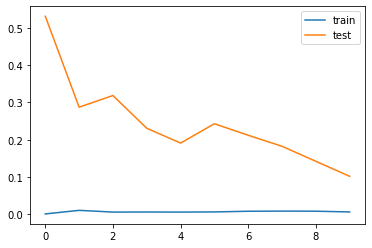

In [272]:
plt.plot(history_1_3days.history['loss'], label='train')
plt.plot(history_1_3days.history['val_loss'], label='test')
plt.legend()

In [273]:
# predicted price values
def pred_LSTM(model, x_test):
    pred = model_output_1.predict(x_test)
    pred = scaler1.inverse_transform(pred)
    return pred

In [472]:
# prediction - all
pred_LSTM_1_3days_all = model_output_1_3days_all.predict(x_test_3_all)
pred_LSTM_1_3days_all = y_scaler_3_all.inverse_transform(pred_LSTM_1_3days_all)
print(pred_LSTM_1_3days_all[-1])
print(pred_LSTM_1_3days_all.shape)
# prediction - no social media
pred_LSTM_1_3days_no = model_output_1_3days_no.predict(x_test_3_no)
pred_LSTM_1_3days_no = y_scaler_3_no.inverse_transform(pred_LSTM_1_3days_no)
print(pred_LSTM_1_3days_no[-1])
print(pred_LSTM_1_3days_no.shape)
# prediction - twt
pred_LSTM_1_3days_twt = model_output_1_3days_twt.predict(x_test_3_twt)
pred_LSTM_1_3days_twt = y_scaler_3_twt.inverse_transform(pred_LSTM_1_3days_twt)
print(pred_LSTM_1_3days_twt[-1])
print(pred_LSTM_1_3days_twt.shape)
# prediction - ggl
pred_LSTM_1_3days_ggl = model_output_1_3days_ggl.predict(x_test_3_ggl)
pred_LSTM_1_3days_ggl = y_scaler_3_ggl.inverse_transform(pred_LSTM_1_3days_ggl)
print(pred_LSTM_1_3days_ggl[-1])
print(pred_LSTM_1_3days_ggl.shape)
# prediction - wiki
pred_LSTM_1_3days_wiki = model_output_1_3days_wiki.predict(x_test_3_wiki)
pred_LSTM_1_3days_wiki = y_scaler_3_wiki.inverse_transform(pred_LSTM_1_3days_wiki)
print(pred_LSTM_1_3days_wiki[-1])
print(pred_LSTM_1_3days_wiki.shape)

[46621.38]
(96, 1)
[45885.816]
(96, 1)
[46708.91]
(96, 1)
[44955.94]
(96, 1)
[45739.062]
(96, 1)


In [481]:
# prediction - all
pred_LSTM_3_3days_all = model_output_3_3days_all.predict(x_test_3_all)
pred_LSTM_3_3days_all = y_scaler_3_all.inverse_transform(pred_LSTM_3_3days_all)
print(pred_LSTM_3_3days_all[-1])
print(pred_LSTM_3_3days_all.shape)
# prediction - all
pred_LSTM_3_3days_no = model_output_3_3days_no.predict(x_test_3_no)
pred_LSTM_3_3days_no = y_scaler_3_no.inverse_transform(pred_LSTM_3_3days_no)
print(pred_LSTM_3_3days_no[-1])
print(pred_LSTM_3_3days_no.shape)
# prediction - twt
pred_LSTM_3_3days_twt = model_output_3_3days_twt.predict(x_test_3_twt)
pred_LSTM_3_3days_twt = y_scaler_3_twt.inverse_transform(pred_LSTM_3_3days_twt)
print(pred_LSTM_3_3days_twt[-1])
print(pred_LSTM_3_3days_twt.shape)
# prediction - ggl
pred_LSTM_3_3days_ggl = model_output_3_3days_ggl.predict(x_test_3_ggl)
pred_LSTM_3_3days_ggl = y_scaler_3_ggl.inverse_transform(pred_LSTM_3_3days_ggl)
print(pred_LSTM_3_3days_ggl[-1])
print(pred_LSTM_3_3days_ggl.shape)
# prediction - wiki
pred_LSTM_3_3days_wiki = model_output_3_3days_wiki.predict(x_test_3_wiki)
pred_LSTM_3_3days_wiki = y_scaler_3_wiki.inverse_transform(pred_LSTM_3_3days_wiki)
print(pred_LSTM_3_3days_wiki[-1])
print(pred_LSTM_3_3days_wiki.shape)

[41051.027 43822.004 45044.66 ]
(96, 3)
[43981.434 47386.445 49765.434]
(96, 3)
[44781.69  47532.5   49255.914]
(96, 3)
[42831.484 45004.395 47744.7  ]
(96, 3)
[46246.305 46522.42  50272.06 ]
(96, 3)


In [443]:
import matplotlib

<ipython-input-473-de674ecf0365>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Pred_all'] = pred_LSTM_1_3days_all
<ipython-input-473-de674ecf0365>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Pred_no'] = pred_LSTM_1_3days_no
<ipython-input-473-de674ecf0365>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

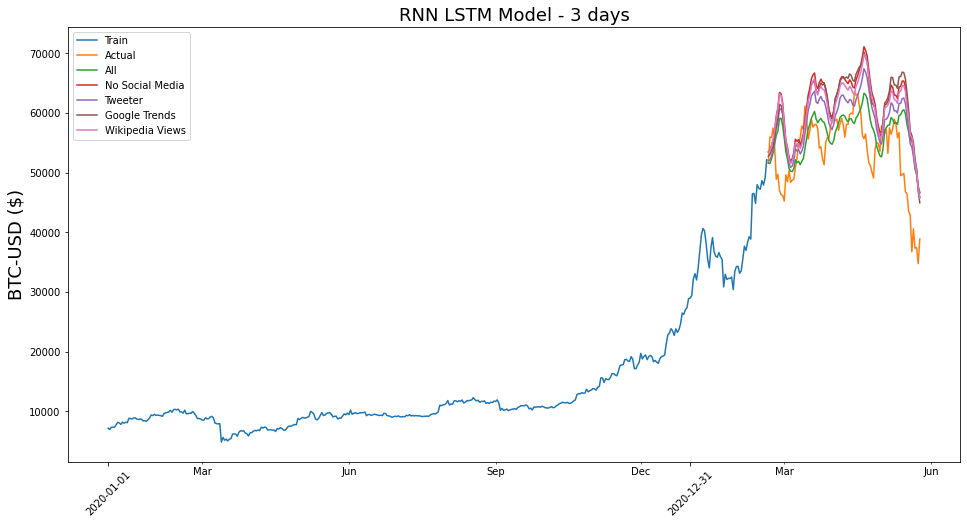

In [473]:
data_len = df_new.shape[0] - pred_LSTM_1_3days_all.shape[0]
#Plot the data
train = df_new[: data_len]
valid = df_new[data_len:]
valid['Pred_all'] = pred_LSTM_1_3days_all
valid['Pred_no'] = pred_LSTM_1_3days_no
valid['Pred_twt'] = pred_LSTM_1_3days_twt
valid['Pred_ggl'] = pred_LSTM_1_3days_ggl
valid['Pred_wiki'] = pred_LSTM_1_3days_wiki

#Visualize the data
fig, ax = plt.subplots(figsize=(16, 8))
# plt.figure(figsize=(16,8))
plt.title('RNN LSTM Model - 3 days', size=18)
# plt.xlabel('Date', fontsize=18)
plt.ylabel('BTC-USD ($)', fontsize=18)
ax.plot(train['close'], label='Train')
ax.plot(valid[['close']], label='Actual')
ax.plot(valid[['Pred_all']], label='All')
ax.plot(valid[['Pred_no']], label='No Social Media')
ax.plot(valid[['Pred_twt']], label='Tweeter')
ax.plot(valid[['Pred_ggl']], label='Google Trends')
ax.plot(valid[['Pred_wiki']], label='Wikipedia Views')

# Rotate tick marks on x-axis
# plt.setp(ax.get_xticklabels(), rotation=45)

ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
ax.xaxis.set_minor_locator(matplotlib.dates.MonthLocator((3,6,9,12)))

# ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("\n%Y"))
ax.xaxis.set_minor_formatter(matplotlib.dates.DateFormatter("%b"))
plt.setp(ax.get_xticklabels(), rotation=45, ha="center")


plt.legend()
# plt.legend(['Train', 'Val', 'Predictions'], loc='upper left')
plt.show()


<ipython-input-474-59b987e56e48>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Pred_all'] = pred_LSTM_1_3days_all
<ipython-input-474-59b987e56e48>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Pred_no'] = pred_LSTM_1_3days_no
<ipython-input-474-59b987e56e48>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

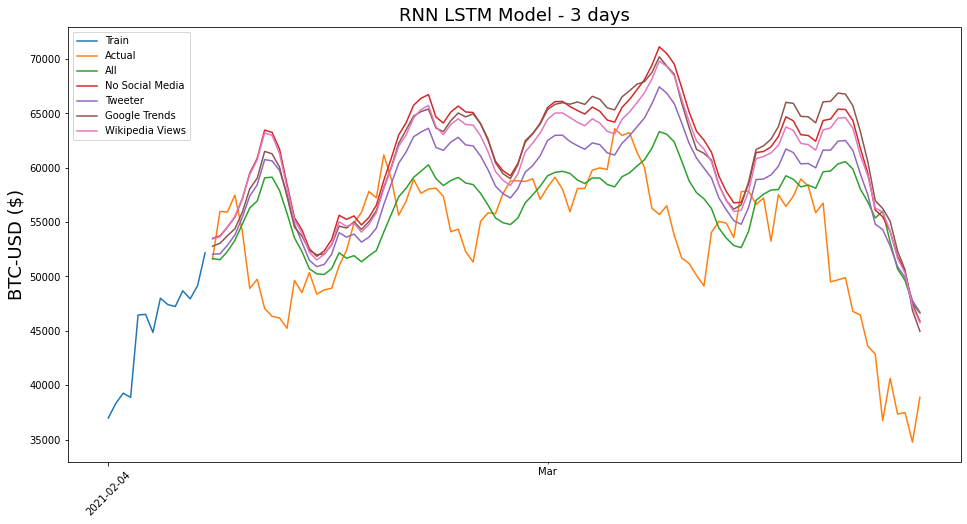

In [474]:
data_len = df_new.shape[0] - pred_LSTM_1_3days_all.shape[0]
#Plot the data
train = df_new[400: data_len]
valid = df_new[data_len:]
valid['Pred_all'] = pred_LSTM_1_3days_all
valid['Pred_no'] = pred_LSTM_1_3days_no
valid['Pred_twt'] = pred_LSTM_1_3days_twt
valid['Pred_ggl'] = pred_LSTM_1_3days_ggl
valid['Pred_wiki'] = pred_LSTM_1_3days_wiki

#Visualize the data
fig, ax = plt.subplots(figsize=(16, 8))
# plt.figure(figsize=(16,8))
plt.title('RNN LSTM Model - 3 days', size=18)
# plt.xlabel('Date', fontsize=18)
plt.ylabel('BTC-USD ($)', fontsize=18)
ax.plot(train['close'], label='Train')
ax.plot(valid[['close']], label='Actual')
ax.plot(valid[['Pred_all']], label='All')
ax.plot(valid[['Pred_no']], label='No Social Media')
ax.plot(valid[['Pred_twt']], label='Tweeter')
ax.plot(valid[['Pred_ggl']], label='Google Trends')
ax.plot(valid[['Pred_wiki']], label='Wikipedia Views')

# Rotate tick marks on x-axis
# plt.setp(ax.get_xticklabels(), rotation=45)

ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
ax.xaxis.set_minor_locator(matplotlib.dates.MonthLocator((3,6,9,12)))

# ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("\n%Y"))
ax.xaxis.set_minor_formatter(matplotlib.dates.DateFormatter("%b"))
plt.setp(ax.get_xticklabels(), rotation=45, ha="center")


plt.legend()
# plt.legend(['Train', 'Val', 'Predictions'], loc='upper left')
plt.show()


In [91]:
# evaluate one or more weekly forecasts against expected values
def evaluate_forecasts(actual, predicted):
    scores = list()
    # calculate an RMSE score for each day
    for i in range(actual.shape[1]):
        # calculate mse
        mse = mean_squared_error(actual[:, i], predicted[:, i])
        # calculate rmse
        rmse = sqrt(mse)
        # store
        scores.append(rmse)
    # calculate overall RMSE
    s = 0
    for row in range(actual.shape[0]):
        for col in range(actual.shape[1]):
            s += (actual[row, col] - predicted[row, col])**2
    score = sqrt(s / (actual.shape[0] * actual.shape[1]))
    return score, scores


In [166]:
evaluate_forecasts(y_test, pred)

(52003.73828394669, [52079.08757881618, 51923.77054456998, 52008.24046157026])

In [55]:
scores = model.evaluate(x_test_3, y_test_3, batch_size=10, verbose=0)
print(scores)

757249600.0


# Other models

# training and test split for other models

In [518]:
df_new1 = df_new.copy()
df_new1['prediction'] = df_new1[['close']].shift(-1)
df_new1

,close,volume,Polarity,btc_google_trend,views,prediction
time,,,,,,
2020-01-01,7174.33,3350.630049,0.000000,9.38,12716.0,6945.02
2020-01-02,6945.02,8010.927387,0.034091,9.38,12265.0,7334.45
2020-01-03,7334.45,14056.392385,0.097222,9.38,15018.0,7348.63
2020-01-04,7348.63,4742.466210,0.000000,9.38,8099.0,7355.40
2020-01-05,7355.40,5942.014946,0.012500,9.38,6024.0,7764.63
...,...,...,...,...,...,...
2021-05-20,40623.33,51445.797357,0.096088,73.00,46983.0,37340.77
2021-05-21,37340.77,55961.900060,0.112594,56.00,38338.0,37476.83
2021-05-22,37476.83,29239.027383,0.072489,47.00,39086.0,34758.67


In [561]:
#Create the independent dataset (X)
X = np.array(df_new1.drop(['prediction'], 1))
#remove the last n+1 rows of data where n is the prediction_days
X = X[:len(df_new1) - 1]
# print(X)
print(X.shape)

(509, 5)


In [562]:
#Create a dependent data set (y)
y = np.array(df_new1['prediction'])
# Get all of the y values except the last n+1 rows
y = y[:- 1]
# print(y)
print(y.shape)

(509,)


### Training and test set split

In [577]:
#Split the data into 80% training data set and a 20% testing data set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [578]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(407, 5) (102, 5)
(407,) (102,)


In [579]:
# split sample the sameway as the LSTM model
x_train = X[:training_data_len, :]
x_test = X[training_data_len:, :]
print(x_train.shape, x_test.shape)
y_train = y[:training_data_len]
y_test = y[training_data_len:]
print(y_train.shape, y_test.shape)

(408, 5) (101, 5)
(408,) (101,)


### Feature scaling

In [580]:
#Scale the data
scaler_1 = MinMaxScaler(feature_range=(0,1))
x_train = scaler_1.fit_transform(x_train)
x_test = scaler_1.transform(x_test)
print(x_train.shape, x_test.shape)
# # scaler for tranforming the prediction
# scaler1 = MinMaxScaler(feature_range=(0,1))
# scaler1.fit(np.reshape(y_train,(y_train.shape[0], 1)))

(408, 5) (101, 5)


In [581]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(408, 5)
(101, 5)
(408,)
(101,)


## Random Forest

In [582]:
#use the RandomForestRegressor for the model
# from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 4, random_state=1)
forest.fit(x_train, y_train)
print(forest.score(x_test, y_test))

-1.931066937998069


In [583]:
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
accuracy = cross_val_score(forest, x_test, y_test, cv=cv)
accuracy.mean()

0.6949351345011037

In [594]:
#show how close the predicted values and the actual values are
preds = forest.predict(x_test)
#Print the predicted test values
print(preds[:5])
print()
print(y_test[:5])

[44419.4025 44419.4025 44459.5625 44419.4025 45520.005 ]

[47232.45 48680.69 47936.37 49158.71 52170.01]


In [660]:
# to predict the price
# make sure to use scaled data
lastest_val = np.array([scaler_1.transform(df_new)[-1]])
print(lastest_val)
print(lastest_val.shape) # checking the shape
# price prediction
prediction = forest.predict(lastest_val)
#print the price 
print('The price today is ', df_y_val[-1])
print('The price is predicted to be', prediction)

[[0.78861431 0.32485614 0.30812264 0.54976826 0.52457987]]
(1, 5)
The price today is  [38878.56]
The price is predicted to be [40413.0675]


In [586]:
df_new_val[-1]

array([3.88785600e+04, 4.44194583e+04, 1.35153300e-01, 5.32000000e+01,
       3.56840000e+04])

In [590]:
rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(prediction)),2)))
rms

14364.909247520747

### including prediction in the data frame

In [623]:
df_new2 = df_new1.copy()
df_new2 = df_new2.loc[df_new2['prediction'].isna()==False]
df_new2.shape

(509, 6)

In [624]:
train = df_new2[:training_data_len]
valid = df_new2[training_data_len:]
train.shape, valid.shape

((408, 6), (101, 6))

In [625]:
valid['preds_rforest'] = 0
valid['preds_rforest'] = preds

<ipython-input-625-eb6e647cde6d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['preds_rforest'] = 0
<ipython-input-625-eb6e647cde6d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['preds_rforest'] = preds


# Other models

In [587]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = "r2"

# Spot-Check Algorithms
models = []
models.append((' LR ', LinearRegression()))
models.append((' LASSO ', Lasso()))
models.append((' EN ', ElasticNet()))
models.append((' KNN ', KNeighborsRegressor()))
models.append((' CART ', DecisionTreeRegressor()))
models.append((' SVR ', SVR()))

In [588]:
# models
def other_model(other_model):
    model = other_model
    model.fit(x_train, y_train)

    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, x_test, y_test, cv=kfold, scoring=scoring)

    # make sure to use scaled data
    lastest_val = np.array([scaler_1.transform(df_new)[-1]])
    
    model.predict(lastest_val)
    print(cv_results.mean())
    print(model.predict(lastest_val))
    
    # price prediction
    prediction = model.predict(lastest_val)
    #print the price 
    print('The price today is ', df_y_val[-1])
    print('The price is predicted to be', prediction)

In [657]:
# Other models
print('Linear Regression', other_model(LinearRegression()))
print('Lasso Regression', other_model(Lasso()))
print('ElasticNet', other_model(ElasticNet()))
print('DecisionTreeRegressor', other_model(DecisionTreeRegressor()))
print('KNeighborsRegressor', other_model(KNeighborsRegressor()))


0.7829267919510438
[39261.21757125]
The price today is  [38878.56]
The price is predicted to be [39261.21757125]
Linear Regression None
0.7859709017446657
[39267.41519534]
The price today is  [38878.56]
The price is predicted to be [39267.41519534]
Lasso Regression None
-0.12338176666383154
[17221.9286033]
The price today is  [38878.56]
The price is predicted to be [17221.9286033]
ElasticNet None
0.5571255598715437
[36754.67]
The price today is  [38878.56]
The price is predicted to be [36754.67]
DecisionTreeRegressor None
0.7124529987514518
[37650.314]
The price today is  [38878.56]
The price is predicted to be [37650.314]
KNeighborsRegressor None


In [648]:
# KNeighbor regressor
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

model.fit(x_train,y_train)
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
cv_results = cross_val_score(model, x_test, y_test, cv=kfold, scoring='r2')
print(cv_results.mean())

preds_knn = model.predict(x_test)

0.7161118120238454


In [628]:
def preds_model(x_train, y_train, x_test, other_model):
    model = other_model
    model.fit(x_train, y_train)

    preds = model.predict(x_test)
    
    return preds

In [632]:
# predictions for linear regression
preds = preds_model(x_train, y_train, x_test, LinearRegression())
valid['preds_lr'] = preds

# predictions for KNeighborsRegressor()
# preds_knn = preds_model(x_train, y_train, x_test, KNeighborsRegressor())
valid['preds_knn'] = preds_knn

# predictions for Lasso()
preds = preds_model(x_train, y_train, x_test, Lasso())
valid['preds_lasso'] = preds

# predictions for DecisionTreeRegressor()
preds = preds_model(x_train, y_train, x_test, DecisionTreeRegressor())
valid['preds_DecisionTreeReg'] = preds

<ipython-input-632-3e7a829ca6c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['preds_lr'] = preds_lr


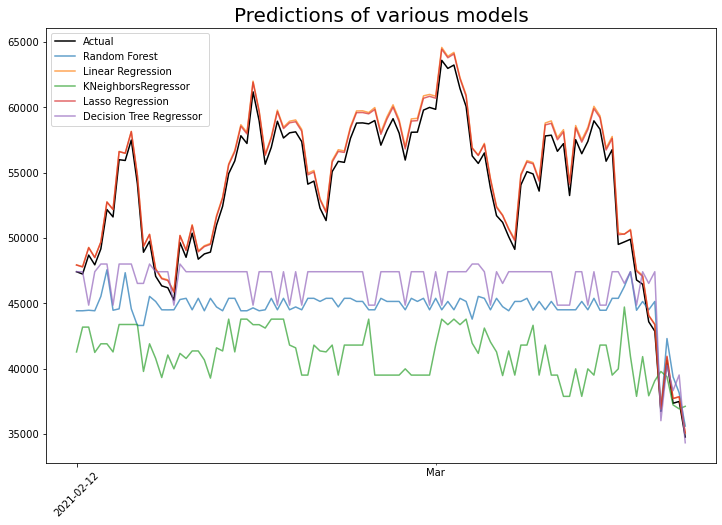

In [665]:
fig, ax = plt.subplots(figsize=(12, 8))
# plt.plot(train['close'])
ax.plot(valid['close'], label='Actual', color='black')
ax.plot(valid['preds_rforest'], label='Random Forest', alpha=0.7)
ax.plot(valid['preds_lr'], label='Linear Regression', alpha=0.7)
ax.plot(valid['preds_knn'], label='KNeighborsRegressor', alpha=0.7)
ax.plot(valid['preds_lasso'], label='Lasso Regression ', alpha=0.7)
ax.plot(valid['preds_DecisionTreeReg'], label='Decision Tree Regressor ', alpha=0.7)


# Rotate tick marks on x-axis
# plt.setp(ax.get_xticklabels(), rotation=45)

ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
ax.xaxis.set_minor_locator(matplotlib.dates.MonthLocator((3,6,9,12)))

# ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("\n%Y"))
ax.xaxis.set_minor_formatter(matplotlib.dates.DateFormatter("%b"))
plt.setp(ax.get_xticklabels(), rotation=45, ha="center")

plt.title("Predictions of various models", size=20)
plt.legend()

plt.show()


In [552]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    # print(cv_results)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


 LR : 0.994547 (0.001962)
 LASSO : 0.994563 (0.001960)
 EN : 0.312253 (0.040506)
 KNN : 0.988095 (0.002657)
 CART : 0.990103 (0.005045)
 SVR : -0.345379 (0.181875)


# Checking the coefficient

In [696]:
# Create Model
model = LinearRegression()
# Fit
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [698]:
# Score
print("Train R2: {:.3f}".format(model.score(x_train,y_train)))
print("Test R2: {:.3f}".format(model.score(x_test,y_test)))

Train R2: 0.992
Test R2: 0.835


In [700]:
# Check Coefficient
coef_df = pd.DataFrame({'Feature': df_new.columns, 'coef': model.coef_, 'abs_coef': np.abs(model.coef_)})
coef_df.sort_values(by='abs_coef', ascending=False)

,Feature,coef,abs_coef
0,close,44145.413728,44145.413728
3,btc_google_trend,-780.352744,780.352744
1,volume,469.927509,469.927509
4,views,-149.988116,149.988116
2,Polarity,-124.073057,124.073057


Text(0.5, 1.0, 'Linear Regression Coefficients')

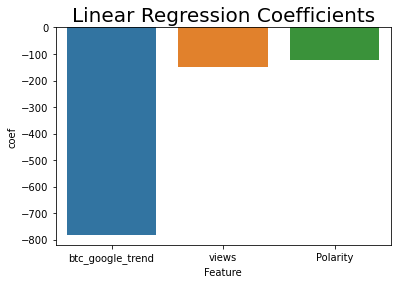

In [723]:
coef_df1 = coef_df[2:].sort_values(by='abs_coef', ascending=False)
sns.barplot(x="Feature", y="coef", data=coef_df1)
plt.title("Linear Regression Coefficients", size=20)